# Some graphs of bivariate relationships

In [3]:
import numpy as np
import pandas as pd

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#!conda install -c conda-forge folium=0.5.0 --yes 
#import folium 

%pylab inline
%config InlineBackend.figure_format = 'svg'

import seaborn as sns
sns.set(style="whitegrid"); # set optional settings for seaborn

Populating the interactive namespace from numpy and matplotlib


In [4]:
pd.set_option('display.max_columns', None) 

In [4]:
df = pd.read_pickle('data/users_train.pkl')

In [5]:
df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,account_elapse_time,gender_female,gender_male,gender_other,signup_method_basic,signup_method_facebook,language_ca,language_cs,language_da,language_de,language_el,language_en,language_es,language_fi,language_fr,language_hr,language_hu,language_id,language_is,language_it,language_ja,language_ko,language_nl,language_no,language_pl,language_pt,language_ru,language_sv,language_th,language_tr,country_dest_id,year_created,month_created,day_created,year_active,month_active,day_active,year_first_booking,month_first_booking,day_first_booking,lag_book_create,lag_active_create,affiliate_channel_2,affiliate_provider_2,first_affiliate_tracked_2,first_device_type_2,first_browser_2,signup_app_2,affiliate_channel_2_brand,affiliate_channel_2_direct,affiliate_provider_2_direct,affiliate_provider_2_google,first_affiliate_tracked_2_linked,first_affiliate_tracked_2_omg,first_affiliate_tracked_2_other,first_device_type_2_android,first_device_type_2_ipad,first_device_type_2_iphone,first_device_type_2_mac desktop,first_device_type_2_other,first_browser_2_chrome,first_browser_2_firefox,first_browser_2_ie,first_browser_2_other,signup_app_2_android,signup_app_2_ios,signup_app_2_moweb,secs_elapsed_mean,secs_elapsed_std,num_different_devices,num_different_actions,num_sessions,first_action_type,country_USA_World,country_USA_World_bi
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,unknown,NaN,facebook,0.0,en,direct,direct,untracked,web,mac desktop,chrome,NDF,465 days 19:27:05,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010,6,0,2009,3,3,NaN,NaN,NaN,NaN,465,direct,direct,untracked,mac desktop,chrome,web,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,male,38.0,facebook,0.0,en,seo,google,untracked,web,mac desktop,chrome,NDF,731 days 06:11:51,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2011,5,2,2009,5,5,NaN,NaN,NaN,NaN,731,other,google,untracked,mac desktop,chrome,web,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,female,56.0,basic,3.0,en,direct,direct,untracked,web,windows desktop,ie,US,475 days 00:47:13,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2010,9,1,2009,6,1,2010.0,8.0,0.0,418.0,475,direct,direct,untracked,windows desktop,ie,web,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,USA,1.0
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,female,42.0,facebook,0.0,en,direct,direct,untracked,web,mac desktop,firefox,other,764 days 17:58:31,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2011,12,0,2009,10,5,2012.0,9.0,5.0,1042.0,764,direct,direct,untracked,mac desktop,firefox,web,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,WLD,0.0
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,unknown,41.0,basic,0.0,en,direct,direct,untracked,web,mac desktop,chrome,US,279 days 17:48:55,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2010,9,1,2009,12,1,2010.0,2.0,3.0,71.0,279,direct,direct,untracked,mac desktop,chrome,web,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,USA,1.0


Typical user demographic (age, gender, language)

Heatmap of most popular destinations

In [6]:
dest_bookings = df.groupby(['country_destination'])['id'].count().reset_index()
dest_bookings = dest_bookings[dest_bookings['country_destination'] != 'NDF']
dest_bookings['pct_of_total'] = [(x/dest_bookings['id'].sum())*100 for x in dest_bookings['id']]
dest_bookings = dest_bookings.sort_values(by='pct_of_total', ascending = False)
dest_bookings

,country_destination,id,pct_of_total
10,US,62376,70.157916
11,other,10094,11.353309
4,FR,5023,5.649660
6,IT,2835,3.188689
5,GB,2324,2.613938
3,ES,2249,2.529581
1,CA,1428,1.606155
2,DE,1061,1.193368
8,NL,762,0.857066
0,AU,539,0.606245


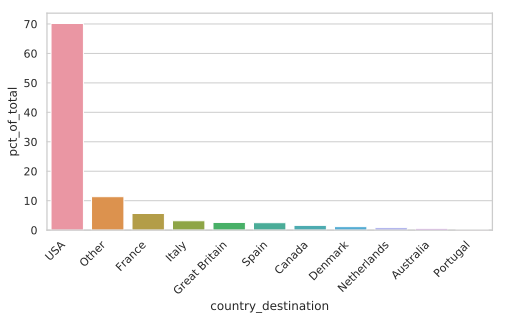

In [7]:
x = dest_bookings['country_destination']
y = dest_bookings['pct_of_total']

fig, ax = plt.subplots(figsize = (8,4))

fig = sns.barplot(x, y, estimator = sum, ci = None)

x_lab = ['USA', 'Other', 'France', 'Italy', 'Great Britain', 'Spain', 
         'Canada', 'Denmark', 'Netherlands', 'Australia', 'Portugal']
ax.set_xticklabels(labels=x_lab, rotation=45, ha='right');

#### Destination and user age

In [8]:
df.loc[df.age > 85, 'age'] = np.nan
df.loc[df.age < 18, 'age'] = np.nan
df.age.describe()


count    122659.000000
mean         36.438036
std          11.355767
min          18.000000
25%          28.000000
50%          33.000000
75%          42.000000
max          85.000000
Name: age, dtype: float64

In [9]:
#df['age'][df['age'].isna() == True] = df['age'].median()
df.age.describe()

count    122659.000000
mean         36.438036
std          11.355767
min          18.000000
25%          28.000000
50%          33.000000
75%          42.000000
max          85.000000
Name: age, dtype: float64

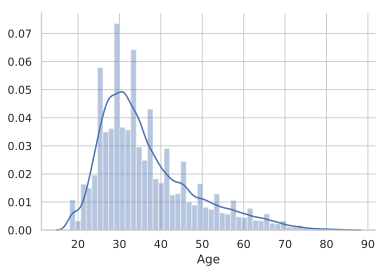

In [10]:
sns.distplot(df.age.dropna())
plt.xlabel('Age')
sns.despine()

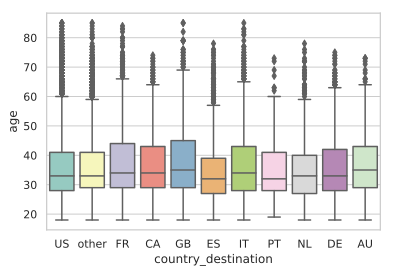

In [11]:
#ages = sns.load_dataset("tips")
ax = sns.boxplot(x='country_destination', y='age',              
data=df[df['country_destination']!='NDF'], palette="Set3")


#### Destination and user gender

In [12]:
dest_gender = df.groupby(['country_destination','gender'])['id'].count().reset_index()
dest_gender = dest_gender[dest_gender['country_destination'] != 'NDF']
#dest_gender['pct_of_total'] = [(x/dest_gender['id'].sum())*100 for x in dest_bookings['id']]
#dest_bookings = dest_bookings.sort_values(by='pct_of_total', ascending = False)
dest_gender.head()


,country_destination,gender,id
0,AU,female,207
1,AU,male,188
2,AU,other,1
3,AU,unknown,143
4,CA,female,455


In [13]:
gender_dict = dict(dest_gender[dest_gender['gender']=='female'].groupby('gender')['id'].sum())
male_dict = dict(dest_gender[dest_gender['gender']=='male'].groupby('gender')['id'].sum())
gender_dict.update(male_dict)
gender_dict


{'female': 31993, 'male': 27721}

In [14]:
dest_gender['total_users_by_gender'] = dest_gender['gender'].map(gender_dict)


In [15]:
dest_gender['pct_of_tot'] = (dest_gender['id']/dest_gender['total_users_by_gender'] )*100
dest_gender = dest_gender.sort_values(by=['pct_of_tot'], ascending = False)
dest_gender.head()

,country_destination,gender,id,total_users_by_gender,pct_of_tot
40,US,female,22694,31993.0,70.934267
41,US,male,19457,27721.0,70.188666
45,other,male,3443,27721.0,12.420187
44,other,female,3160,31993.0,9.877161
16,FR,female,1962,31993.0,6.132592


In [16]:
dest_gender = dest_gender[(dest_gender.gender == 'male') | (dest_gender.gender == 'female')]


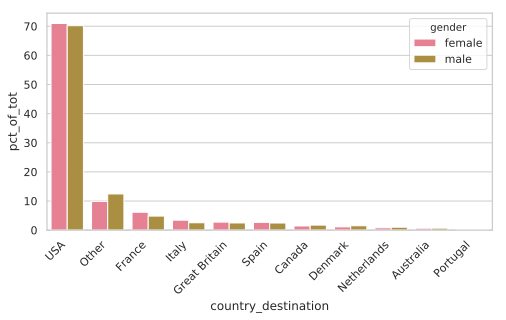

In [17]:
sns.set_palette("husl")

x = dest_gender['country_destination']
y = dest_gender['pct_of_tot']

fig, ax = plt.subplots(figsize = (8,4))

fig = sns.barplot(x, y, data=dest_gender, estimator = sum, ci = None, 
                  hue='gender')
                  #palette=["#3498db","#2ecc71"])

x_lab = ['USA', 'Other', 'France', 'Italy', 'Great Britain', 'Spain', 
         'Canada', 'Denmark', 'Netherlands', 'Australia', 'Portugal']
ax.set_xticklabels(labels=x_lab, rotation=45, ha='right');

Destination and user language

In [18]:
# use language_distance from countries dataset

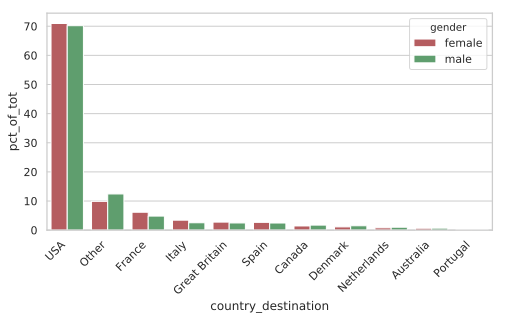

In [19]:
x = dest_gender['country_destination']
y = dest_gender['pct_of_tot']

fig, ax = plt.subplots(figsize = (8,4))

fig = sns.barplot(x, y, data=dest_gender, estimator = sum, ci = None, 
                  hue='gender', palette=['r','g'])

x_lab = ['USA', 'Other', 'France', 'Italy', 'Great Britain', 'Spain', 
         'Canada', 'Denmark', 'Netherlands', 'Australia', 'Portugal']
ax.set_xticklabels(labels=x_lab, rotation=45, ha='right');

Destination and signup browser

Destinations over time

In [20]:
dates = df.date_account_created.value_counts().reset_index()
dates.head()

,index,date_account_created
0,2014-05-13,674
1,2014-06-24,670
2,2014-06-25,636
3,2014-05-20,632
4,2014-05-14,622


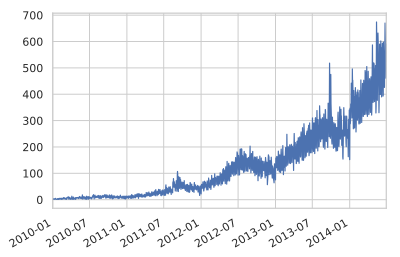

In [21]:
df.date_account_created.value_counts().plot(kind='line', linewidth=1.2, color='b')


In [5]:
Xy = pd.read_pickle('data_for_regression.pkl')

In [15]:
Xy.describe()

,age,signup_flow,gender_female,gender_male,gender_other,signup_method_basic,signup_method_facebook,language_ca,language_cs,language_da,language_de,language_el,language_en,language_es,language_fi,language_fr,language_hr,language_hu,language_id,language_is,language_it,language_ja,language_ko,language_nl,language_no,language_pl,language_pt,language_ru,language_sv,language_th,language_tr,country_dest_id,year_created,month_created,day_created,year_active,month_active,day_active,year_first_booking,month_first_booking,day_first_booking,lag_book_create,lag_active_create,affiliate_channel_2_brand,affiliate_channel_2_direct,affiliate_provider_2_direct,affiliate_provider_2_google,first_affiliate_tracked_2_linked,first_affiliate_tracked_2_omg,first_affiliate_tracked_2_other,first_device_type_2_android,first_device_type_2_ipad,first_device_type_2_iphone,first_device_type_2_mac desktop,first_device_type_2_other,first_browser_2_chrome,first_browser_2_firefox,first_browser_2_ie,first_browser_2_other,signup_app_2_android,signup_app_2_ios,signup_app_2_moweb,secs_elapsed_mean,secs_elapsed_std,num_different_devices,num_different_actions,num_sessions,country_USA_World_bi
count,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.0,88908.000000,88908.0,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000,88908.000000
mean,35.306755,2.316889,0.353073,0.305709,0.001968,0.736177,0.262755,0.000022,0.000090,0.000214,0.002981,0.000067,0.975323,0.003037,0.000067,0.004432,0.0,0.000045,0.0,0.000022,0.001136,0.000934,0.002643,0.000394,0.000146,0.000146,0.000664,0.001192,0.000472,0.000045,0.000225,1.933830,2012.910615,6.042820,2.761720,2012.909761,6.042246,2.761461,2013.022158,6.143440,2.806485,43.044698,-0.670322,0.200252,0.675114,0.673269,0.228135,0.221847,0.180153,0.032224,0.012552,0.060197,0.069184,0.467360,0.038129,0.329487,0.174439,0.085358,0.172988,0.013058,0.058904,0.023339,23898.344216,70299.792512,1.098394,13.499944,53.732667,0.277163
std,9.576261,6.329767,0.477928,0.460710,0.044322,0.440707,0.440133,0.004743,0.009485,0.014617,0.054514,0.008215,0.155140,0.055024,0.008215,0.066423,0.0,0.006707,0.0,0.004743,0.033686,0.030540,0.051344,0.019837,0.012091,0.012091,0.025752,0.034508,0.021730,0.006707,0.014997,1.991642,0.975908,3.181313,1.924927,0.976532,3.180881,1.924968,1.005985,3.155091,1.896549,87.964842,13.503263,0.400191,0.468335,0.469021,0.419632,0.415491,0.384317,0.176596,0.111332,0.237853,0.253768,0.498936,0.191509,0.470029,0.379488,0.279415,0.378239,0.113526,0.235445,0.150978,14630.359202,38313.961992,0.344431,4.672636,46.200030,0.447600
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2010.000000,1.000000,0.000000,2009.000000,1.000000,0.000000,2010.000000,1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [17]:
month_booking = Xy.groupby(['month_first_booking','country_USA_World_bi'])['age'].count().reset_index()

In [18]:
month_booking.columns=['month_first_booking','country_USA_World_bi','count']

In [25]:
Xy.country_USA_World_bi.value_counts()

0.0    64266
1.0    24642
Name: country_USA_World_bi, dtype: int64

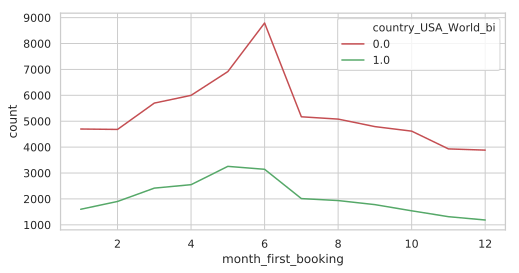

In [21]:
x = month_booking['month_first_booking']
y = month_booking['count']

fig, ax = plt.subplots(figsize = (8,4))

fig = sns.lineplot(x, y, data=month_booking, estimator = sum, ci = None, 
                  hue='country_USA_World_bi', palette=['r','g'])

#x_lab = ['February', 'April', 'June', 'August', 'October', 'December']
#         'Canada', 'Denmark', 'Netherlands', 'Australia', 'Portugal']
#ax.set_xticklabels(labels=x_lab, ha='right');

**Pair plots**

In [26]:
y_bi = Xy['country_USA_World_bi']
y_mlt = Xy['country_dest_id']   
X = Xy.drop(['country_dest_id','country_USA_World_bi'], axis = 1)

In [28]:
Xy.shape

(88908, 68)

In [ ]:
pairs = Xy.iloc[:,0:5].join(Xy['country_USA_World_bi'])
sns.pairplot(pairs, hue='country_USA_World_bi')

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
